<a href="https://colab.research.google.com/github/Joe-brands/My-Learning-Journey/blob/master/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series analysis of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years**

In [1]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!mkdir -p household_power_consumption

In [4]:
!ls "/content/gdrive/My Drive"

'Colab Notebooks'		   kaggle
 household_power_consumption.zip  'my kaggle screenshot.jpg'


In [5]:
#!unzip \*.zip && rm *.zip
!unzip -q -n "/content/gdrive/My Drive/household_power_consumption.zip" 

In [6]:
!ls "/content"

gdrive			     household_power_consumption.txt
household_power_consumption  sample_data


In [7]:
df = pd.read_csv("household_power_consumption.txt", sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


In [8]:
print(df.shape)
print(df.head())

(2075259, 7)
                    Global_active_power  ... Sub_metering_3
datetime                                 ...               
2006-12-16 17:24:00               4.216  ...           17.0
2006-12-16 17:25:00               5.360  ...           16.0
2006-12-16 17:26:00               5.374  ...           17.0
2006-12-16 17:27:00               5.388  ...           17.0
2006-12-16 17:28:00               3.666  ...           17.0

[5 rows x 7 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [10]:
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [11]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
#check for missing values
df.isnull().values.any()

True

In [13]:
# mark all missing values
df.replace('?', nan, inplace=True)
# make dataset numeric
df = df.astype('float32')

In [14]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

In [15]:
# fill missing
fill_missing(df.values)

In [16]:
# add a column for for the remainder of sub metering
values = df.values
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [17]:
# save updated dataset
df.to_csv('household_power_consumption.csv')

In [18]:
new_df = pd.read_csv("household_power_consumption.csv", header=0, index_col=0)
print(new_df.head())


                     Global_active_power  ...  sub_metering_4
datetime                                  ...                
2006-12-16 17:24:00                4.216  ...       52.266670
2006-12-16 17:25:00                5.360  ...       72.333336
2006-12-16 17:26:00                5.374  ...       70.566666
2006-12-16 17:27:00                5.388  ...       71.800000
2006-12-16 17:28:00                3.666  ...       43.100000

[5 rows x 8 columns]


In [19]:
print(new_df.describe())

       Global_active_power  ...  sub_metering_4
count         2.075259e+06  ...    2.075259e+06
mean          1.089418e+00  ...    9.298722e+00
std           1.054678e+00  ...    9.561278e+00
min           7.600000e-02  ...   -2.400000e+00
25%           3.080000e-01  ...    3.800000e+00
50%           6.020000e-01  ...    5.500000e+00
75%           1.526000e+00  ...    1.036667e+01
max           1.112200e+01  ...    1.248333e+02

[8 rows x 8 columns]


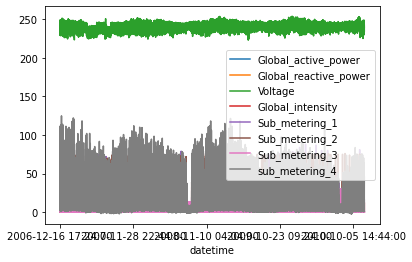

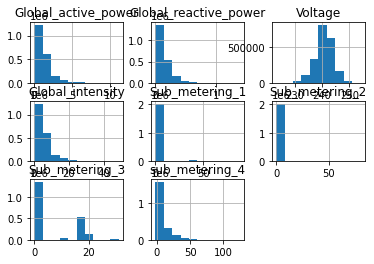

In [20]:
new_df.plot()
plt.show()
new_df.hist()
plt.show()

In [21]:
# line plot for each variable
#plt.figure()
#for i in range(len(new_df.columns)):
  # create subplot
  #plt.subplot(len(new_df.columns), 1, i+1)
  # get variable name
  #name = new_df.columns[i]
  # plot data
  #plt.plot(new_df[name])
  # set title
  #plt.title(name, y=0)
  # turn off ticks to remove clutter
  #plt.yticks([])
  #plt.xticks([])
#plt.show()

datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-11-22    2041.536
2010-11-23    1577.536
2010-11-24    1796.248
2010-11-25    1431.164
2010-11-26    1488.104
Name: Global_active_power, Length: 1442, dtype: float64
datetime
2006-12-16    0.0
2006-12-17    0.0
2006-12-18    0.0
2006-12-19    0.0
2006-12-20    0.0
             ... 
2010-11-22    0.0
2010-11-23    0.0
2010-11-24    0.0
2010-11-25    0.0
2010-11-26    0.0
Name: Global_active_power, Length: 1442, dtype: float64
datetime
2006-12-16    0.0
2006-12-17    0.0
2006-12-18    0.0
2006-12-19    0.0
2006-12-20    0.0
             ... 
2010-11-22    0.0
2010-11-23    0.0
2010-11-24    0.0
2010-11-25    0.0
2010-11-26    0.0
Name: Global_active_power, Length: 1442, dtype: float64
datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-11-2

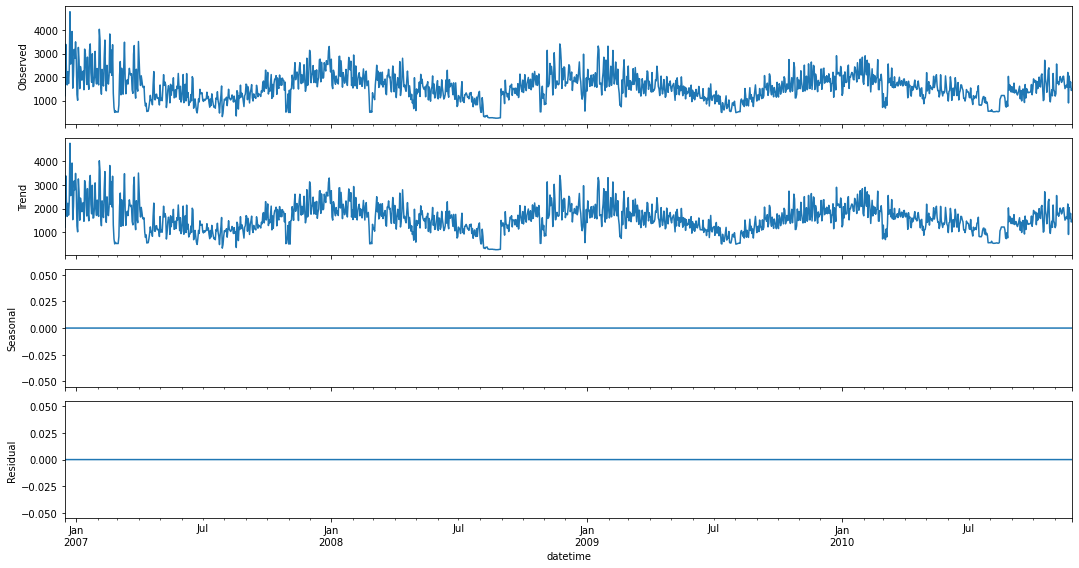

In [53]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(new_df[ 'Global_active_power' ], model= 'additive', freq=1 )

print(decompose_series.trend)
print(decompose_series.seasonal)
print(decompose_series.resid)
print(decompose_series.observed)
decompose_series.plot()
plt.show()

datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-11-22    2041.536
2010-11-23    1577.536
2010-11-24    1796.248
2010-11-25    1431.164
2010-11-26    1488.104
Name: Global_active_power, Length: 1442, dtype: float64
datetime
2006-12-16    1.0
2006-12-17    1.0
2006-12-18    1.0
2006-12-19    1.0
2006-12-20    1.0
             ... 
2010-11-22    1.0
2010-11-23    1.0
2010-11-24    1.0
2010-11-25    1.0
2010-11-26    1.0
Name: Global_active_power, Length: 1442, dtype: float64
datetime
2006-12-16    1.0
2006-12-17    1.0
2006-12-18    1.0
2006-12-19    1.0
2006-12-20    1.0
             ... 
2010-11-22    1.0
2010-11-23    1.0
2010-11-24    1.0
2010-11-25    1.0
2010-11-26    1.0
Name: Global_active_power, Length: 1442, dtype: float64
datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-11-2

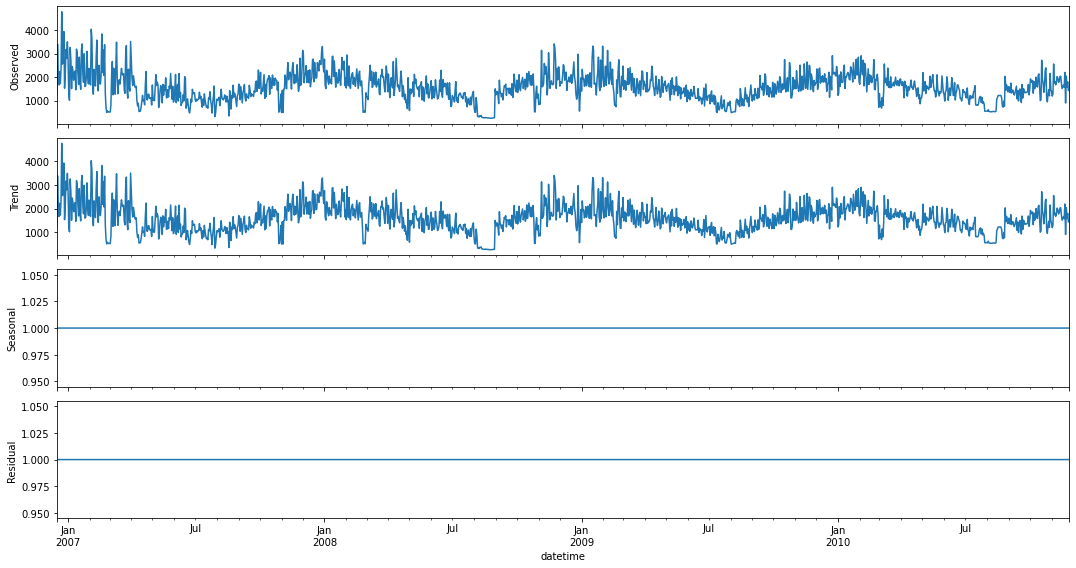

In [54]:
decompose_series = sm.tsa.seasonal_decompose(new_df[ 'Global_active_power' ], model= 'multiplicative', freq=1 )

print(decompose_series.trend)
print(decompose_series.seasonal)
print(decompose_series.resid)
print(decompose_series.observed)
decompose_series.plot()
plt.show()

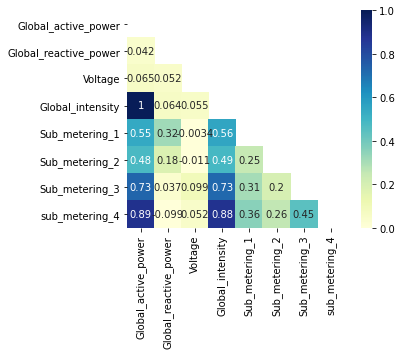

In [51]:
#correlation matrix
pearson = new_df.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

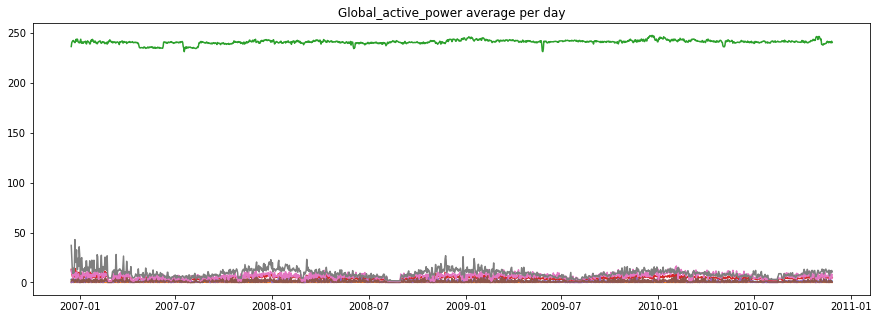

In [22]:
plt.figure(figsize=(15, 5))
mean = df.resample('D').mean()
plt.plot(mean)
plt.title('Global_active_power average per day', loc='center')
plt.show()

In [72]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plots
plt.figure()
lags = 365
# acf
#axis = plt.subplot(2, 1, 1)
#plot_acf(new_df, ax=axis, lags=lags)
# pacf
#axis = plt.subplot(2, 1, 2)
#plot_pacf(new_df, ax=axis, lags=lags)
# show plot
#plt.show()

<Figure size 1080x576 with 0 Axes>

In [23]:
#resample minute data to total for each day
# resample data to daily
daily_groups = df.resample('D')

daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16          1209.176025  ...    14680.933594
2006-12-17          3390.459961  ...    36946.667969
2006-12-18          2203.825928  ...    19028.433594
2006-12-19          1666.193970  ...    13131.900391
2006-12-20          2225.748047  ...    20384.800781

[5 rows x 8 columns]


In [24]:
# load the new file
new_df = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(new_df.head())


            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...       14680.934
2006-12-17             3390.460  ...       36946.668
2006-12-18             2203.826  ...       19028.434
2006-12-19             1666.194  ...       13131.900
2006-12-20             2225.748  ...       20384.800

[5 rows x 8 columns]


In [25]:
X = new_df.iloc[:,[1,2,3,4,5,6]]
y = new_df.iloc[:,0]

X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,
2006-12-16,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,226.006,345725.30,14398.6,2033.0,4187.0,13341.0
2006-12-18,161.792,347373.62,9247.2,1063.0,2621.0,14018.0
2006-12-19,150.942,348479.00,7094.0,839.0,7602.0,6197.0
2006-12-20,160.998,348923.62,9313.0,0.0,2648.0,14063.0


In [26]:
y.head()

datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64

In [36]:
#Create the dataset, ensure all data is float
dataset = new_df.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))

#Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#Split into training and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8621, 1, 30)
(8621,)
(2853, 1, 30)
(2853,)


**Using Facebook Prophet to forcast**

In [39]:
from fbprophet import Prophet

In [49]:
df = pd.DataFrame(pd.date_range(start="2019-09-01", end="2019-09-30", freq='D', name='ds'))
df["y"] = range(1,31)
df["Global_reactive_power"] = range(101,131)
df["Voltage"] = range(201,231)
df["Global_intensity"] = range(201,231)
df["Sub_metering_1"] = range(201,231)
df["Sub_metering_2"] = range(201,231)
df["Sub_metering_3"] = range(201,231)
df.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2019-09-01,1,101,201,201,201,201,201
1,2019-09-02,2,102,202,202,202,202,202
2,2019-09-03,3,103,203,203,203,203,203
3,2019-09-04,4,104,204,204,204,204,204
4,2019-09-05,5,105,205,205,205,205,205


In [ ]:
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.fit(X_train)

In [ ]:
forecast = m.predict(df_test.drop(columns="y"))

In [30]:
print(new_df.head())

            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...       14680.934
2006-12-17             3390.460  ...       36946.668
2006-12-18             2203.826  ...       19028.434
2006-12-19             1666.194  ...       13131.900
2006-12-20             2225.748  ...       20384.800

[5 rows x 8 columns]


In [31]:
new_df1= new_df.reset_index()
print(new_df1.head())

    datetime  Global_active_power  ...  Sub_metering_3  sub_metering_4
0 2006-12-16             1209.176  ...          4926.0       14680.934
1 2006-12-17             3390.460  ...         13341.0       36946.668
2 2006-12-18             2203.826  ...         14018.0       19028.434
3 2006-12-19             1666.194  ...          6197.0       13131.900
4 2006-12-20             2225.748  ...         14063.0       20384.800

[5 rows x 9 columns]


In [32]:
new_df1 = new_df1[['datetime','Global_active_power']]
new_df1.head()

,datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [33]:
fb_df = new_df1.rename(columns={"datetime":"ds","Global_active_power":"y"})
fb_df.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [40]:
# Setup and train model and fit
model = Prophet(daily_seasonality=True)
model.fit(fb_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [41]:
future = model.make_future_dataframe(periods=7, freq= 'D')
forecast = model.predict(future) 
print(forecast.head(7))

          ds        trend  ...  multiplicative_terms_upper         yhat
0 2006-12-16  1295.189676  ...                         0.0  2338.289838
1 2006-12-17  1295.037146  ...                         0.0  2318.023441
2 2006-12-18  1294.884617  ...                         0.0  2023.648844
3 2006-12-19  1294.732087  ...                         0.0  2142.427705
4 2006-12-20  1294.579557  ...                         0.0  2176.545702
5 2006-12-21  1294.427027  ...                         0.0  2043.024729
6 2006-12-22  1294.274497  ...                         0.0  2142.995093

[7 rows x 22 columns]


In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2006-12-16,2338.289838,1761.545603,2916.696310
1,2006-12-17,2318.023441,1781.085603,2855.439916
2,2006-12-18,2023.648844,1493.789700,2581.497077
3,2006-12-19,2142.427705,1584.950126,2652.465489
4,2006-12-20,2176.545702,1631.729071,2690.138552


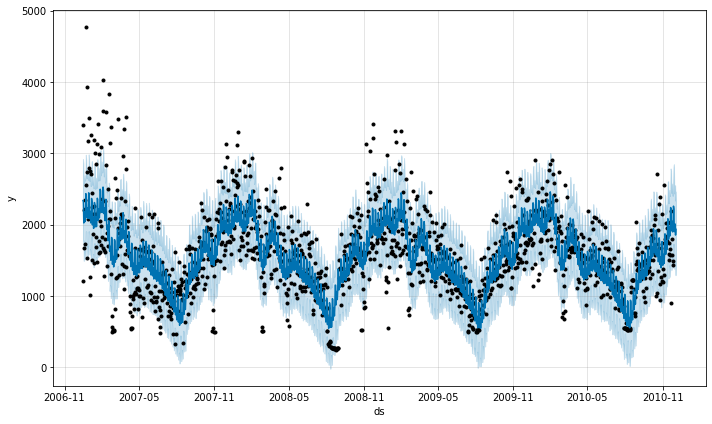

In [43]:
model.plot(forecast)
plt.show()

In [ ]:
metric_fb = forecast.set_index('ds')[['yhat']].join(fb_df.set_index('ds').y).reset_index()
metric_fb

In [45]:
metric_fb.dropna(how="any", inplace=True)
metric_fb

,ds,yhat,y
0,2006-12-16,2338.289838,1209.176
1,2006-12-17,2318.023441,3390.460
2,2006-12-18,2023.648844,2203.826
3,2006-12-19,2142.427705,1666.194
4,2006-12-20,2176.545702,2225.748
...,...,...,...
1437,2010-11-22,1914.445855,2041.536
1438,2010-11-23,2023.321128,1577.536
1439,2010-11-24,2045.295438,1796.248
1440,2010-11-25,1898.014094,1431.164


**Evaluation Metric**

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Calculate MAE

mae = mean_absolute_error(metric_fb.y, metric_fb.yhat)
print(f'Test MAE: {mae:.2f}')

# Calculate RMSE
rmse = np.sqrt(mae)
print(f'Test RMSE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs(metric_fb.y - metric_fb.yhat)/metric_fb.y)*100
print(f'Test MAPE: {mae:.2f}')

Test MAE: 312.09
Test RMSE: 312.09
Test MAPE: 312.09


Tried Calculating metrics in another way since I was getting wrong figures above

In [64]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [65]:
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))